In [308]:
# 数据读取
import pandas as pd
users = pd.read_csv("user_profile_table.csv")

balances = pd.read_csv("user_balance_table.csv", parse_dates=[
                       "report_date"], date_parser=lambda date: pd.datetime.strptime(date, "%Y%m%d"))

shibors = pd.read_csv("mfd_bank_shibor.csv", parse_dates=[
                      "mfd_date"], date_parser=lambda date: pd.datetime.strptime(date, "%Y%m%d"))

interests = pd.read_csv("mfd_day_share_interest.csv", parse_dates=[
    "mfd_date"], date_parser=lambda date: pd.datetime.strptime(date, "%Y%m%d"))

In [309]:
# 多个数据表合并
user_balance = pd.merge(users, balances, on="user_id")
user_balance = user_balance.groupby(by=["report_date"]).sum()
user_balance = user_balance.reset_index()
shibor_interest = pd.merge(shibors, interests, on="mfd_date")
shibor_interest = shibor_interest.reset_index()
from datetime import timedelta
shibor_interest=shibor_interest.set_index("mfd_date")
date_range=pd.date_range("2013-07-01","2014-08-31",freq='D')
day=timedelta(days=1)
# 缺失日期填充（拆解利率和收益率）
for d in date_range:
    if d not in shibor_interest.index.tolist():
        shibor_interest.loc[d]=shibor_interest.loc[d-day]
shibor_interest = shibor_interest.reset_index()
user_balance_shibor_interest = pd.merge(
    user_balance, shibor_interest, left_on="report_date", right_on="mfd_date")
user_balance_shibor_interest.pop("mfd_date")
user_balance_shibor_interest.pop("user_id")
user_balance_shibor_interest = user_balance_shibor_interest.set_index("report_date")
user_balance_shibor_interest.pop("sex")
user_balance_shibor_interest.pop("city")
user_balance_shibor_interest

,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,...,Interest_O_N,Interest_1_W,Interest_2_W,Interest_1_M,Interest_3_M,Interest_6_M,Interest_9_M,Interest_1_Y,mfd_daily_yield,mfd_7daily_yield
report_date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,252327861,225364535,32488348,32458786,21250722,11208064,5525022,382160,5142862,5142862,...,4.4560,5.423,6.0400,6.8800,5.2950,4.2390,4.2820,4.4125,1.5787,6.307
2013-07-02,278810703,252327861,29037390,29007510,16561183,12446327,2554548,350066,2204482,2204482,...,3.7860,4.750,5.0740,5.8000,5.2110,4.2344,4.2808,4.4070,1.5461,6.174
2013-07-03,300127606,278810703,27270770,27234156,20493660,6740496,5953867,454406,5499461,5499461,...,3.4000,4.242,4.6580,5.2000,5.1480,4.2300,4.2796,4.4022,1.4670,6.034
2013-07-04,312038062,300127606,18321185,18282230,12108178,6174052,6410729,535391,5875338,5875338,...,3.3480,3.938,4.4640,5.1020,5.0290,4.2287,4.2776,4.4000,1.4223,5.903
2013-07-05,320923224,312038062,11648749,11607991,6930431,4677560,2763587,697926,2065661,2065661,...,3.3800,3.816,4.2950,4.7885,4.9390,4.2273,4.2749,4.4000,1.3845,5.739
2013-07-06,356057861,320923224,36751272,36709190,31533483,5175707,1616635,300533,1316102,1316102,...,3.3800,3.816,4.2950,4.7885,4.9390,4.2273,4.2749,4.4000,1.3845,5.739
2013-07-07,361037358,356057861,8962232,8920335,5257768,3662567,3982735,336880,3645855,3645855,...,3.3800,3.816,4.2950,4.7885,4.9390,4.2273,4.2749,4.4000,1.3845,5.739
2013-07-08,409947895,361037358,57258266,57218409,47490938,9727471,8347729,852530,7495199,7495199,...,3.2560,3.656,3.6860,4.3000,4.7940,4.2238,4.2741,4.4000,1.3129,5.279
2013-07-09,433273777,409947895,26798941,26755943,21541164,5214779,3473059,765509,2707550,2707550,...,3.2490,3.596,3.6040,4.2980,4.7230,4.2215,4.2720,4.4000,1.3096,5.150


In [318]:
data=user_balance_shibor_interest["2014-04":"2014-08"]
data.to_csv("stable.csv")

In [310]:
# 输出数据
user_balance_shibor_interest.to_csv("new_data.csv")

In [146]:
# 根据趋势观察，取2014-04之后的数据
# 划分训练集和测试集(31天)
alldata = user_balance_shibor_interest
temp = alldata["2014-4":]
train = temp[:-31]
test = temp[-31:]
train

,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,...,Interest_O_N,Interest_1_W,Interest_2_W,Interest_1_M,Interest_3_M,Interest_6_M,Interest_9_M,Interest_1_Y,mfd_daily_yield,mfd_7daily_yield
report_date,,,,,,,,,,,,,,,,,,,,,
2014-04-01,20592900643,20417009416,453320585,450478122,146539591,303938531,277429358,49540539,227888819,37116613,...,2.8660,4.2050,4.503,4.6000,5.5000,5.0000,5.0000,5.0,1.4368,5.356
2014-04-02,20675635695,20592900643,355347118,352449616,141024158,211425458,272612066,51040952,221571114,28301147,...,2.9500,4.2250,4.504,4.6000,5.5000,5.0000,5.0000,5.0,1.4370,5.357
2014-04-03,20772907358,20675635695,363877120,360958034,165866758,195091276,266605457,45762040,220843417,46915541,...,2.9500,4.1030,4.457,4.6000,5.5000,5.0000,5.0000,5.0,1.4364,5.362
2014-04-04,20824610615,20772907358,251895894,248968008,62838487,186129521,200192637,37871189,162321448,35154471,...,2.7630,2.9970,4.278,4.5970,5.5000,5.0000,5.0000,5.0,1.4338,5.367
2014-04-05,20863747475,20824610615,202336542,199391149,68763348,130627801,163199682,43889726,119309956,23061774,...,2.7630,2.9970,4.278,4.5970,5.5000,5.0000,5.0000,5.0,1.4338,5.367
2014-04-06,20853648046,20863747475,129477254,126550557,36688261,89862296,139576683,29557907,110018776,41472248,...,2.7630,2.9970,4.278,4.5970,5.5000,5.0000,5.0000,5.0,1.4338,5.367
2014-04-07,20873617708,20853648046,196936223,194021386,64582752,129438634,176966561,40119763,136846798,35095605,...,2.7630,2.9970,4.278,4.5970,5.5000,5.0000,5.0000,5.0,1.4338,5.367
2014-04-08,20978372726,20873617708,354770149,351854096,104834487,247019609,250015131,44570398,205444733,31814997,...,2.7130,3.5910,4.210,4.4370,5.5000,5.0000,5.0000,5.0,1.4263,5.368
2014-04-09,21072390013,20978372726,383347565,380410136,150308931,230101205,289330278,50308002,239022276,37522743,...,2.7400,3.6700,4.182,4.4010,5.5000,5.0000,5.0000,5.0,1.4239,5.360


In [147]:
train["total_purchase_amt"].describe()

count    1.220000e+02
mean     2.665500e+08
std      8.034401e+07
min      1.253363e+08
25%      1.940179e+08
50%      2.670956e+08
75%      3.270232e+08
max      4.539553e+08
Name: total_purchase_amt, dtype: float64

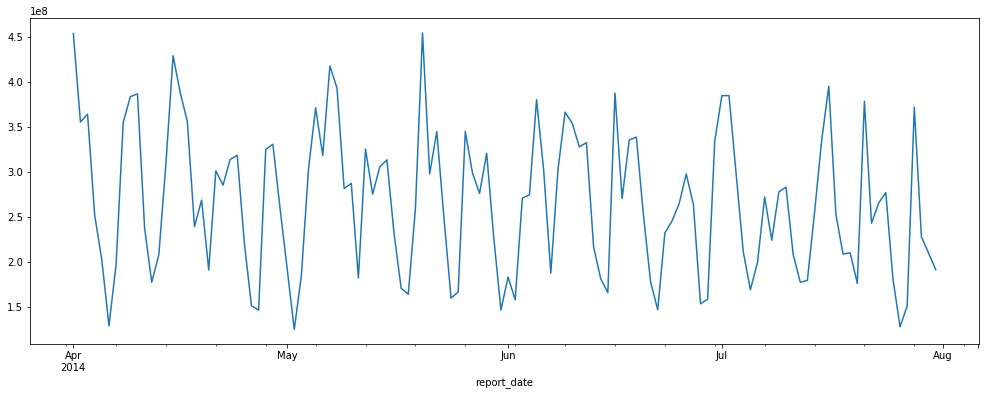

In [148]:
train["total_purchase_amt"].plot(figsize=(17,6))

In [149]:
# 训练集归一化（min-max方法）
utrain=(train-train.min())/(train.max()-train.min())
ualldata=(alldata-alldata.min())/(alldata.max()-alldata.min())

In [150]:
utrain

,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,...,Interest_O_N,Interest_1_W,Interest_2_W,Interest_1_M,Interest_3_M,Interest_6_M,Interest_9_M,Interest_1_Y,mfd_daily_yield,mfd_7daily_yield
report_date,,,,,,,,,,,,,,,,,,,,,
2014-04-01,0.225577,0.138374,0.998069,0.998230,0.538589,1.000000,0.373383,0.320144,0.374503,0.388794,...,0.659601,0.873536,0.661217,0.498672,1.000000,1.000,1.000000,0.0,0.999382,0.989967
2014-04-02,0.254490,0.201735,0.699932,0.699915,0.512400,0.607233,0.362197,0.338631,0.358059,0.230183,...,0.718557,0.885246,0.661597,0.498672,1.000000,1.000,1.000000,0.0,1.000000,0.990803
2014-04-03,0.288484,0.231538,0.725889,0.725807,0.630362,0.537886,0.348250,0.273587,0.356165,0.565099,...,0.718557,0.813817,0.643726,0.498672,1.000000,1.000,1.000000,0.0,0.998146,0.994983
2014-04-04,0.306552,0.266578,0.385126,0.385004,0.141144,0.499838,0.194043,0.176360,0.203841,0.353490,...,0.587310,0.166276,0.575665,0.497223,1.000000,1.000,1.000000,0.0,0.990114,0.999164
2014-04-05,0.320230,0.285203,0.234315,0.234134,0.169278,0.264204,0.108147,0.250518,0.091888,0.135914,...,0.587310,0.166276,0.575665,0.497223,1.000000,1.000,1.000000,0.0,0.990114,0.999164
2014-04-06,0.316700,0.299301,0.012601,0.012469,0.016973,0.091133,0.053296,0.073928,0.067704,0.467162,...,0.587310,0.166276,0.575665,0.497223,1.000000,1.000,1.000000,0.0,0.990114,0.999164
2014-04-07,0.323679,0.295663,0.217881,0.217793,0.149426,0.259156,0.140113,0.204066,0.137534,0.352431,...,0.587310,0.166276,0.575665,0.497223,1.000000,1.000,1.000000,0.0,0.990114,0.999164
2014-04-08,0.360287,0.302857,0.698176,0.698102,0.340557,0.758349,0.309728,0.258904,0.316085,0.293405,...,0.552218,0.514052,0.549810,0.419947,1.000000,1.000,1.000000,0.0,0.966945,1.000000
2014-04-09,0.393144,0.340593,0.785138,0.785003,0.556488,0.686521,0.401016,0.329600,0.403482,0.396101,...,0.571168,0.560304,0.539163,0.402560,1.000000,1.000,1.000000,0.0,0.959530,0.993311


In [151]:
utrain.std()

tBalance               0.284017
yBalance               0.290432
total_purchase_amt     0.244490
direct_purchase_amt    0.244348
purchase_bal_amt       0.195009
purchase_bank_amt      0.216581
total_redeem_amt       0.203137
consume_amt            0.182417
transfer_amt           0.207779
tftobal_amt            0.211361
tftocard_amt           0.209308
share_amt              0.353898
category1              0.216028
category2              0.177464
category3              0.158615
category4              0.187683
index                  0.290901
Interest_O_N           0.260358
Interest_1_W           0.228409
Interest_2_W           0.260542
Interest_1_M           0.240307
Interest_3_M           0.422354
Interest_6_M           0.453530
Interest_9_M           0.406452
Interest_1_Y           0.169739
mfd_daily_yield        0.328969
mfd_7daily_yield       0.341877
dtype: float64

In [152]:
ualldata.std()

tBalance               0.386427
yBalance               0.386470
total_purchase_amt     0.166065
direct_purchase_amt    0.165613
purchase_bal_amt       0.201889
purchase_bank_amt      0.141937
total_redeem_amt       0.239589
consume_amt            0.141303
transfer_amt           0.239755
tftobal_amt            0.218503
tftocard_amt           0.240171
share_amt              0.365941
category1              0.266968
category2              0.222781
category3              0.092707
category4              0.085379
index                  0.287515
Interest_O_N           0.182985
Interest_1_W           0.120931
Interest_2_W           0.157780
Interest_1_M           0.215276
Interest_3_M           0.409783
Interest_6_M           0.455984
Interest_9_M           0.469797
Interest_1_Y           0.470780
mfd_daily_yield        0.261219
mfd_7daily_yield       0.270047
dtype: float64

In [153]:
# 相关系数
train.corr()

,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,...,Interest_O_N,Interest_1_W,Interest_2_W,Interest_1_M,Interest_3_M,Interest_6_M,Interest_9_M,Interest_1_Y,mfd_daily_yield,mfd_7daily_yield
tBalance,1.000000,0.994169,0.085396,0.083183,0.070024,0.074555,-0.049225,-0.154812,-0.025236,-0.000567,...,-0.736128,-0.603706,-0.581763,-0.285687,0.180697,0.603324,0.720399,0.237049,0.408581,0.409322
yBalance,0.994169,1.000000,0.036023,0.033901,0.013116,0.042800,0.013344,-0.123700,0.037566,0.024025,...,-0.709238,-0.593169,-0.547261,-0.241119,0.133438,0.560081,0.682921,0.236000,0.362467,0.366118
total_purchase_amt,0.085396,0.036023,1.000000,0.999995,0.838704,0.898772,0.457047,0.306092,0.444127,0.277702,...,-0.139823,-0.049928,-0.149556,-0.076008,0.157686,0.152774,0.164408,-0.101112,0.195574,0.186537
direct_purchase_amt,0.083183,0.033901,0.999995,1.000000,0.838710,0.898775,0.458046,0.307300,0.444998,0.277937,...,-0.137078,-0.048324,-0.147751,-0.074831,0.155129,0.149715,0.161235,-0.101717,0.192548,0.183525
purchase_bal_amt,0.070024,0.013116,0.838704,0.838710,1.000000,0.515064,0.240619,0.090893,0.246846,0.067053,...,-0.092313,-0.025502,-0.069252,-0.058457,0.131521,0.134999,0.133460,-0.083861,0.159352,0.161787
purchase_bank_amt,0.074555,0.042800,0.898772,0.898775,0.515064,1.000000,0.527244,0.410510,0.501693,0.383485,...,-0.141441,-0.055532,-0.176805,-0.070721,0.138288,0.126968,0.146338,-0.092588,0.174781,0.158617
total_redeem_amt,-0.049225,0.013344,0.457047,0.458046,0.240619,0.527244,1.000000,0.579262,0.988507,0.481717,...,0.173805,0.095877,0.223606,0.362038,-0.304072,-0.302805,-0.247641,-0.120048,-0.275558,-0.257096
consume_amt,-0.154812,-0.123700,0.306092,0.307300,0.090893,0.410510,0.579262,1.000000,0.449374,0.230992,...,0.307525,0.205609,0.212449,0.258101,-0.329557,-0.339018,-0.324888,-0.138079,-0.330503,-0.338863
transfer_amt,-0.025236,0.037566,0.444127,0.444998,0.246846,0.501693,0.988507,0.449374,1.000000,0.485092,...,0.133446,0.066943,0.205657,0.348903,-0.272124,-0.268981,-0.211145,-0.105957,-0.240699,-0.218916
tftobal_amt,-0.000567,0.024025,0.277702,0.277937,0.067053,0.383485,0.481717,0.230992,0.485092,1.000000,...,-0.044724,0.010152,0.018384,0.052437,-0.038677,-0.049612,-0.017947,0.015968,-0.048147,-0.054492


In [154]:
# 各字段与总购买量的相关系数
train.corrwith(train["total_purchase_amt"])

tBalance               0.085396
yBalance               0.036023
total_purchase_amt     1.000000
direct_purchase_amt    0.999995
purchase_bal_amt       0.838704
purchase_bank_amt      0.898772
total_redeem_amt       0.457047
consume_amt            0.306092
transfer_amt           0.444127
tftobal_amt            0.277702
tftocard_amt           0.430150
share_amt              0.186439
category1              0.086454
category2              0.315583
category3              0.074186
category4              0.501270
index                 -0.193760
Interest_O_N          -0.139823
Interest_1_W          -0.049928
Interest_2_W          -0.149556
Interest_1_M          -0.076008
Interest_3_M           0.157686
Interest_6_M           0.152774
Interest_9_M           0.164408
Interest_1_Y          -0.101112
mfd_daily_yield        0.195574
mfd_7daily_yield       0.186537
dtype: float64

In [155]:
ualldata.corrwith(ualldata["total_purchase_amt"])

tBalance               0.618300
yBalance               0.610508
total_purchase_amt     1.000000
direct_purchase_amt    0.999986
purchase_bal_amt       0.808759
purchase_bank_amt      0.970980
total_redeem_amt       0.732118
consume_amt            0.575898
transfer_amt           0.723973
tftobal_amt            0.611104
tftocard_amt           0.709145
share_amt              0.684332
category1              0.622120
category2              0.559691
category3              0.138112
category4              0.412841
index                  0.531840
Interest_O_N          -0.241926
Interest_1_W          -0.085104
Interest_2_W          -0.047119
Interest_1_M           0.012562
Interest_3_M           0.600875
Interest_6_M           0.711592
Interest_9_M           0.703447
Interest_1_Y           0.696639
mfd_daily_yield        0.406989
mfd_7daily_yield       0.416021
dtype: float64

In [23]:
# 协方差
train.cov()

,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,...,Interest_O_N,Interest_1_W,Interest_2_W,Interest_1_M,Interest_3_M,Interest_6_M,Interest_9_M,Interest_1_Y,mfd_daily_yield,mfd_7daily_yield
tBalance,0.110259,0.108176,0.013600,0.013331,0.018963,-0.002713,-0.005130,-0.013464,-0.002356,-0.024605,...,-0.081239,-0.060539,-0.054108,-0.029267,-0.022333,-0.057039,-0.063093,-0.066769,0.075073,0.102562
yBalance,0.108176,0.107837,0.007195,0.006919,0.013667,-0.005832,0.003005,-0.011843,0.005723,-0.021331,...,-0.078219,-0.059094,-0.049688,-0.024009,-0.026408,-0.053887,-0.059541,-0.063181,0.071766,0.100053
total_purchase_amt,0.013600,0.007195,0.054068,0.054157,0.033771,0.039022,-0.006325,0.001808,-0.006956,-0.001987,...,-0.017635,-0.005564,-0.010354,-0.006057,0.009811,-0.015464,-0.016169,-0.016575,0.018913,0.019814
direct_purchase_amt,0.013331,0.006919,0.054157,0.054248,0.033805,0.039112,-0.006311,0.001863,-0.006953,-0.001924,...,-0.017398,-0.005386,-0.010180,-0.005930,0.009803,-0.015268,-0.015955,-0.016354,0.018707,0.019547
purchase_bal_amt,0.018963,0.013667,0.033771,0.033805,0.035469,0.007714,-0.013659,-0.008394,-0.012315,-0.013420,...,-0.015256,-0.008491,-0.006618,-0.005813,0.004716,-0.012079,-0.013301,-0.013846,0.015252,0.022036
purchase_bank_amt,-0.002713,-0.005832,0.039022,0.039112,0.007714,0.047468,0.006700,0.012394,0.004218,0.012747,...,-0.007439,0.002056,-0.007023,-0.001827,0.008679,-0.008043,-0.007620,-0.007564,0.009330,0.002694
total_redeem_amt,-0.005130,0.003005,-0.006325,-0.006311,-0.013659,0.006700,0.056084,0.013539,0.055171,0.023002,...,0.009044,0.006542,0.025137,0.034733,-0.022974,0.011706,0.014155,0.014117,-0.010207,-0.003534
consume_amt,-0.013464,-0.011843,0.001808,0.001863,-0.008394,0.012394,0.013539,0.042318,0.004724,0.008427,...,0.017897,0.011644,0.012082,0.014617,-0.013359,0.016846,0.017758,0.017778,-0.009751,-0.018849
transfer_amt,-0.002356,0.005723,-0.006956,-0.006953,-0.012315,0.004218,0.055171,0.004724,0.056165,0.021994,...,0.005438,0.004220,0.023404,0.032796,-0.020881,0.008430,0.010768,0.010724,-0.008437,0.000484
tftobal_amt,-0.024605,-0.021331,-0.001987,-0.001924,-0.013420,0.012747,0.023002,0.008427,0.021994,0.058018,...,0.016792,0.013514,0.017157,0.013675,-0.012817,0.011511,0.014094,0.014927,-0.019807,-0.026554


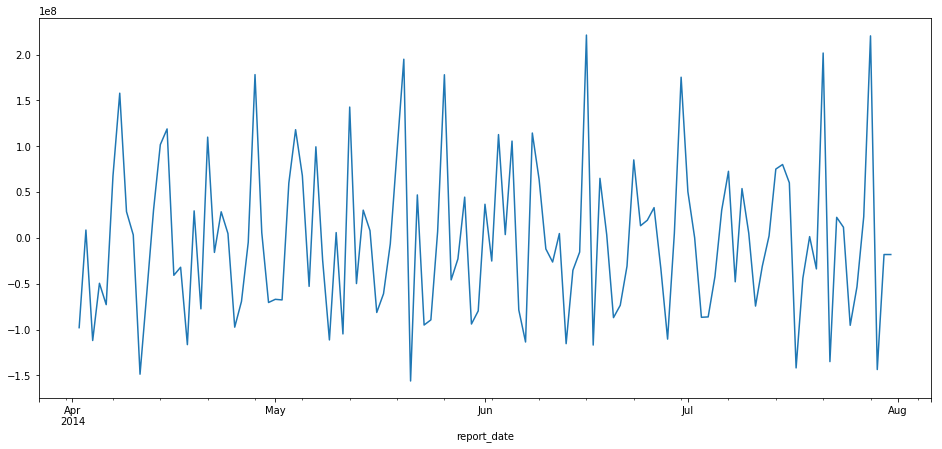

In [186]:
train["total_purchase_amt"].diff(1).dropna().plot(figsize=(16,7))

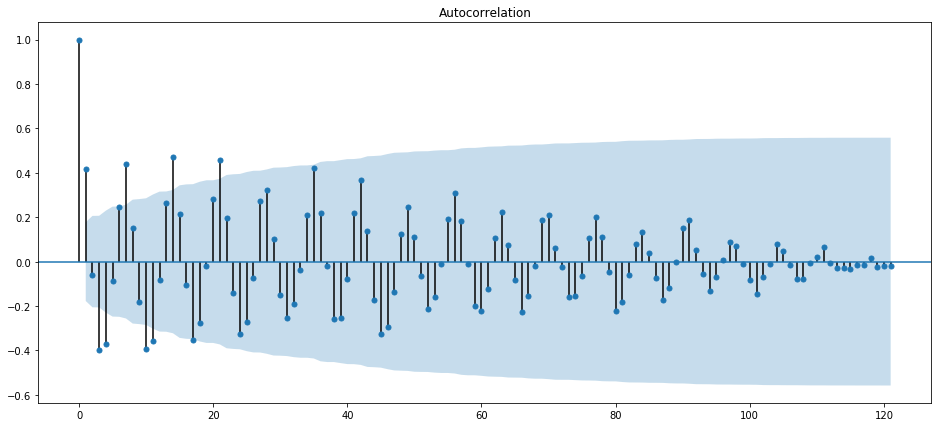

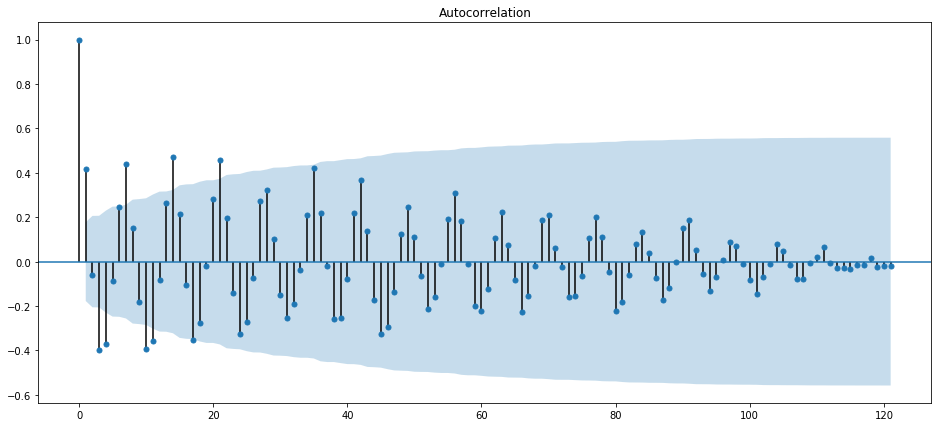

In [198]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot as plt
# 自相关系数和偏自相关系数
tpa=utrain["total_purchase_amt"]
fig=plt.figure(figsize=(16,7))
ax1=fig.add_subplot(111)
plot_acf(tpa,ax=ax1)

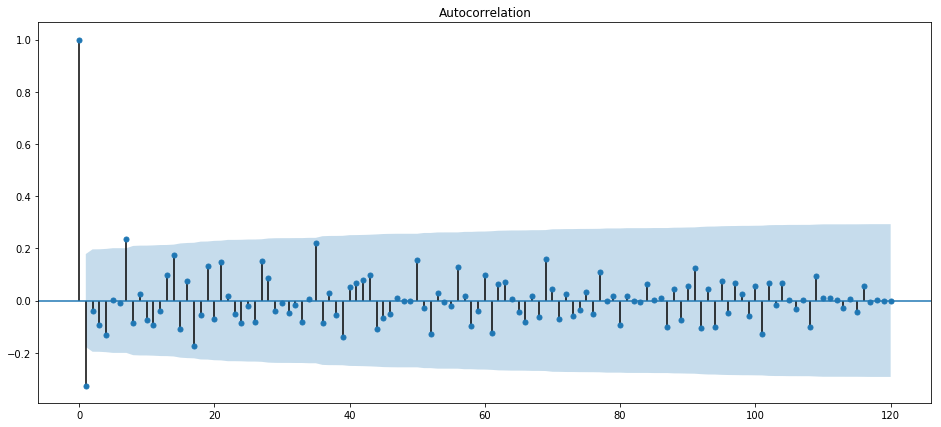

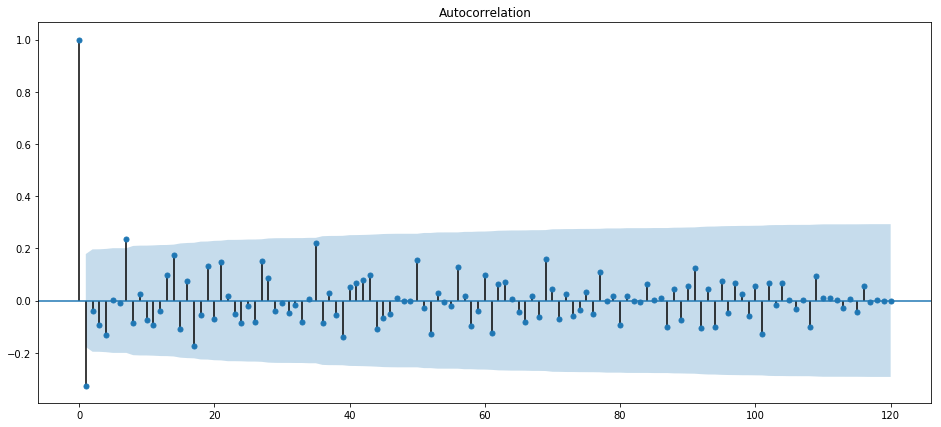

In [215]:
dpa=utrain["purchase_bal_amt"].diff(1).dropna()
fig=plt.figure(figsize=(16,7))
ax1=fig.add_subplot(111)
plot_acf(dpa,ax=ax1)

c:\program files\python36\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\program files\python36\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


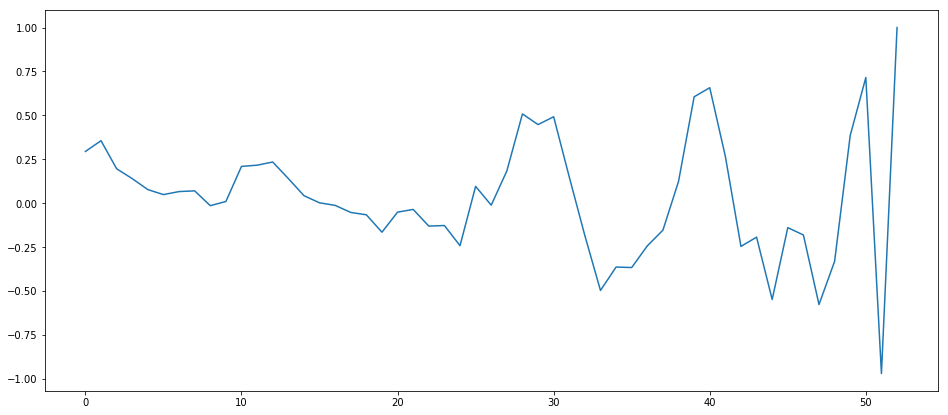

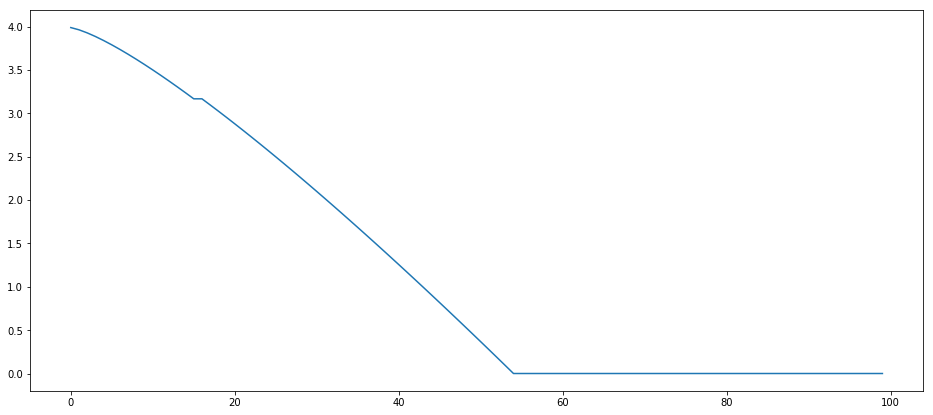

In [24]:
import matplotlib.pyplot as plt
from sklearn import metrics as mr
sh_corr=[]
mi=[]
for i in range(0,100):
    sh_corr.append(train.shift(i).dropna()["mfd_daily_yield"].corr(train["total_purchase_amt"][i:]))
    mi.append(mr.mutual_info_score(train.shift(i).fillna(0)["mfd_daily_yield"],train["total_purchase_amt"]))
plt.figure(figsize=(16,7))
plt.plot(sh_corr)
plt.figure(figsize=(16,7))
plt.plot(mi)
shmdy=sh_corr

In [25]:
train["purchase_bal_amt"][].plot(figsize=(16,7))

SyntaxError: invalid syntax (<ipython-input-25-c7093f0fceae>, line 1)

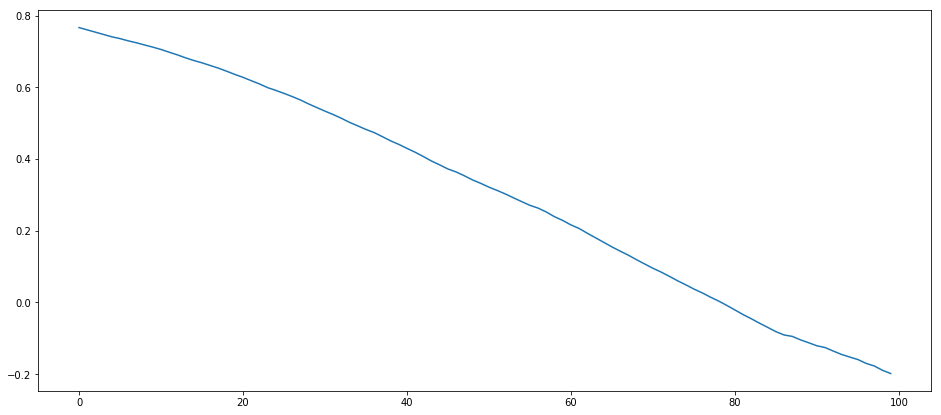

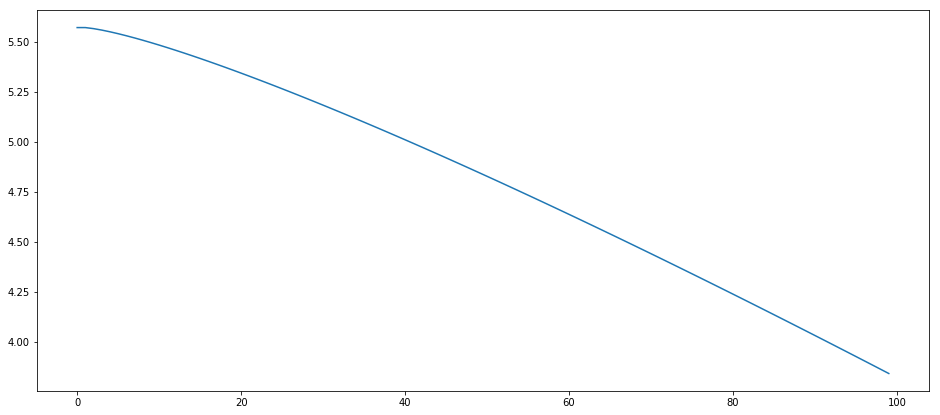

In [207]:
sh_corr=[]
mi=[]
for i in range(0,100):
    sh_corr.append(train.shift(i).dropna()["mfd_7daily_yield"].corr(train["total_purchase_amt"][i:]))
    mi.append(mr.mutual_info_score(train.shift(i).fillna(0)["mfd_7daily_yield"],train["total_purchase_amt"]))
plt.figure(figsize=(16,7))
plt.plot(sh_corr)
plt.figure(figsize=(16,7))
plt.plot(mi)
shm7y=sh_corr

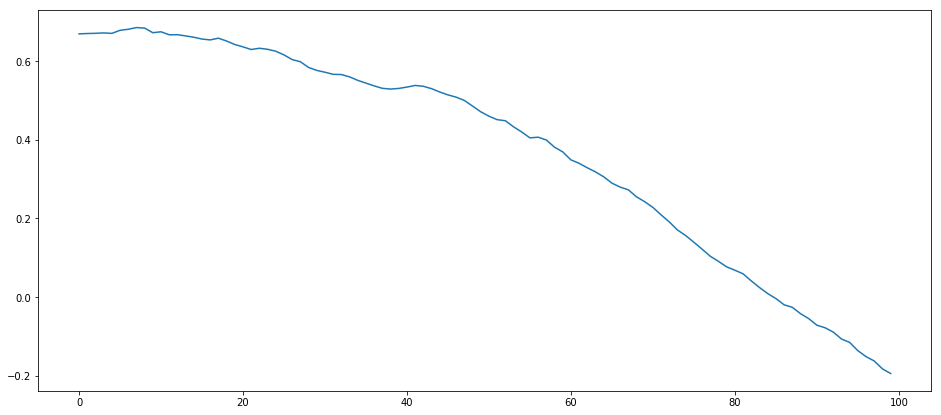

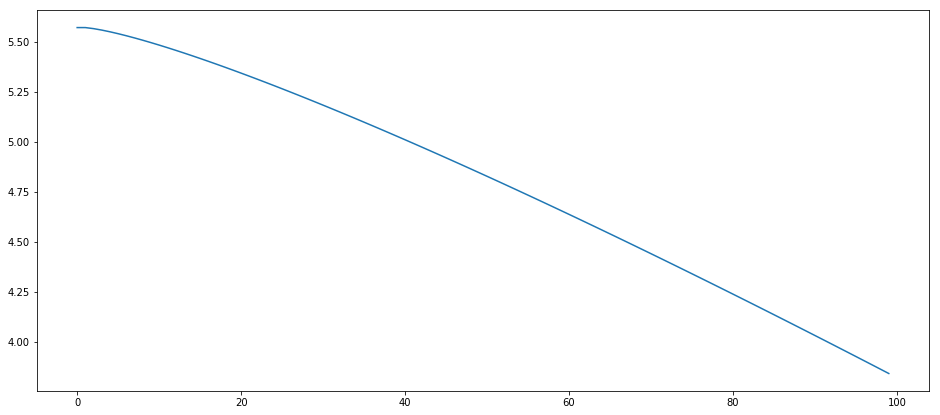

In [208]:
sh_corr=[]
mi=[]
for i in range(0,100):
    sh_corr.append(train.shift(i).dropna()["Interest_O_N"].corr(train["total_purchase_amt"][i:]))
    mi.append(mr.mutual_info_score(train.shift(i).fillna(0)["Interest_O_N"],train["total_purchase_amt"]))
plt.figure(figsize=(16,7))
plt.plot(sh_corr)
plt.figure(figsize=(16,7))
plt.plot(mi)
sh_ion=sh_corr

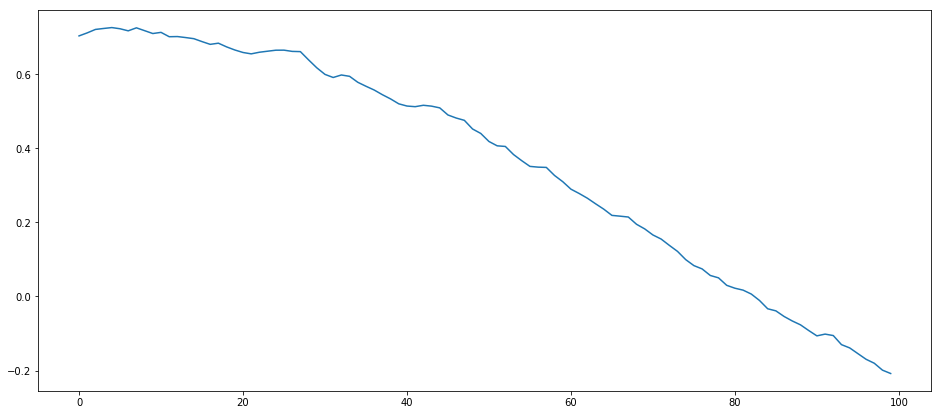

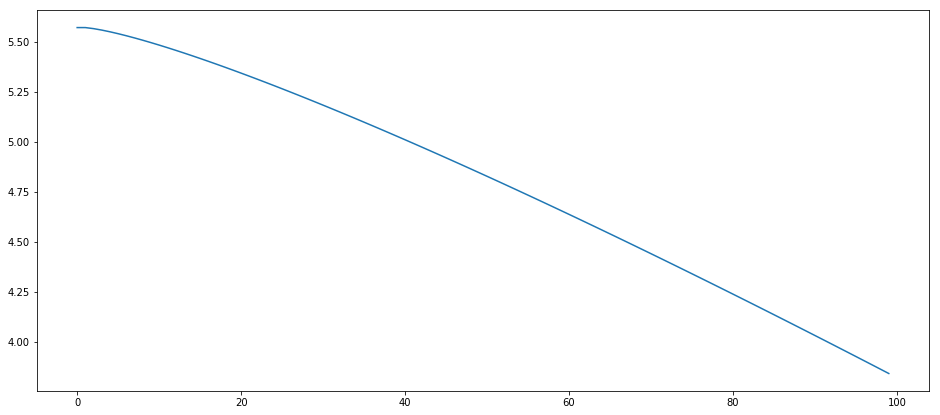

In [209]:
sh_corr=[]
mi=[]
for i in range(0,100):
    sh_corr.append(train.shift(i).dropna()["Interest_1_W"].corr(train["total_purchase_amt"][i:]))
    mi.append(mr.mutual_info_score(train.shift(i).fillna(0)["Interest_1_W"],train["total_purchase_amt"]))
plt.figure(figsize=(16,7))
plt.plot(sh_corr)
plt.figure(figsize=(16,7))
plt.plot(mi)
sh_i1w=sh_corr

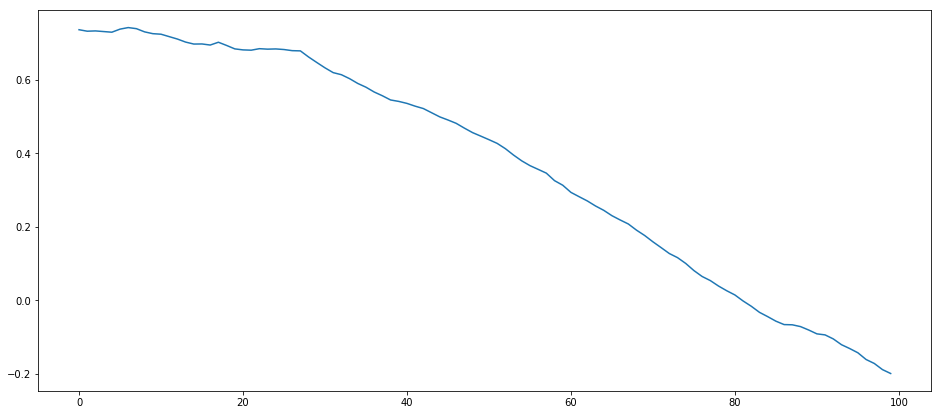

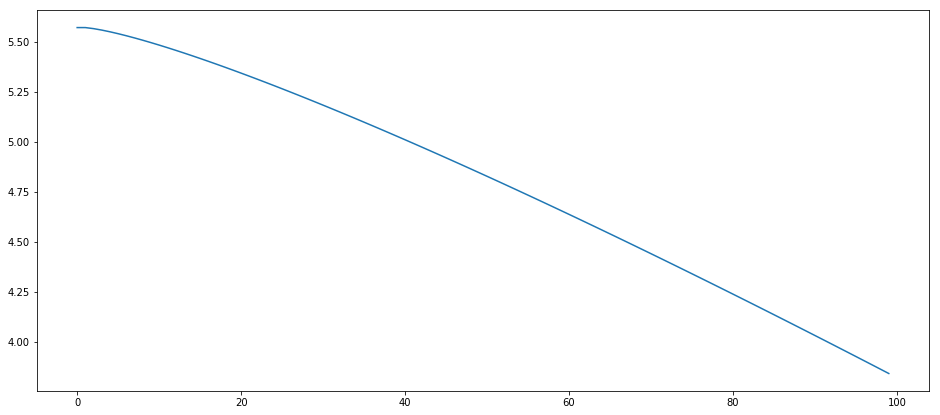

In [210]:
sh_corr=[]
mi=[]
for i in range(0,100):
    sh_corr.append(train.shift(i).dropna()["Interest_1_M"].corr(train["total_purchase_amt"][i:]))
    mi.append(mr.mutual_info_score(train.shift(i).fillna(0)["Interest_1_M"],train["total_purchase_amt"]))
plt.figure(figsize=(16,7))
plt.plot(sh_corr)
plt.figure(figsize=(16,7))
plt.plot(mi)
sh_i1m=sh_corr

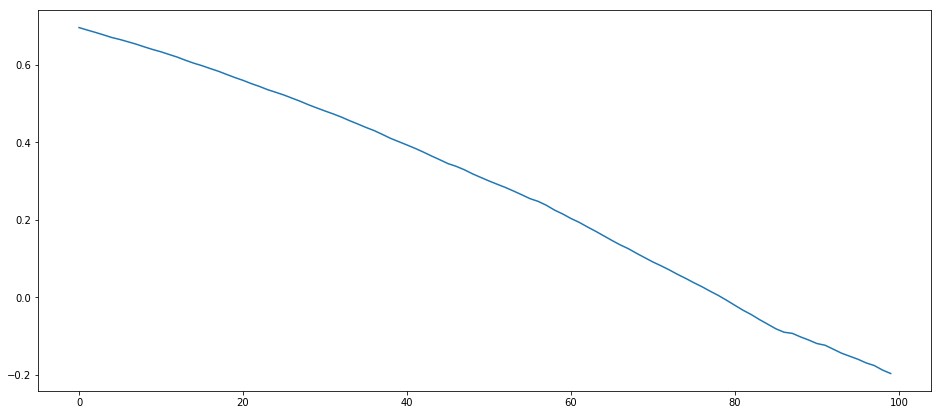

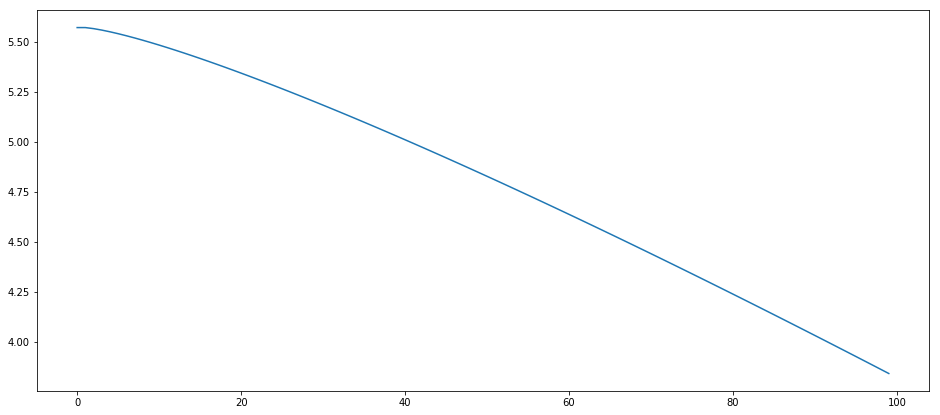

In [211]:
mi=[]
sh_corr=[]
for i in range(0,100):
    sh_corr.append(train.shift(i).fillna(0)["Interest_3_M"].corr(train["total_purchase_amt"][i:]))
    mi.append(mr.mutual_info_score(train.shift(i).fillna(0)["Interest_3_M"],train["total_purchase_amt"]))
plt.figure(figsize=(16,7))
plt.plot(sh_corr)
plt.figure(figsize=(16,7))
plt.plot(mi)
sh_i3m=sh_corr

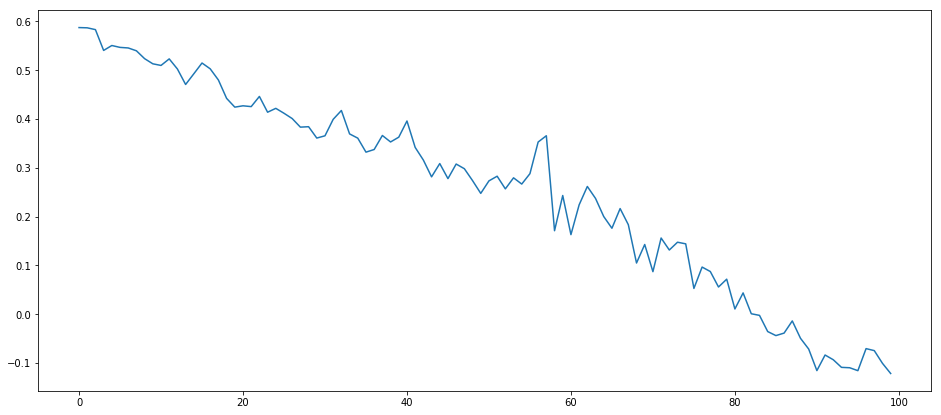

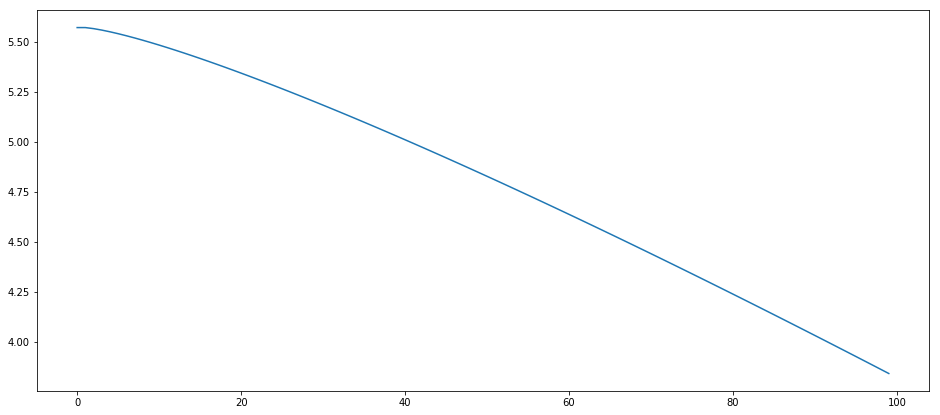

In [212]:
sh_corr=[]
mi=[]
for i in range(0,100):
    sh_corr.append(train.shift(i).dropna()["consume_amt"].corr(train["total_purchase_amt"][i:]))
    mi.append(mr.mutual_info_score(train.shift(i).fillna(0)["consume_amt"],train["total_purchase_amt"]))
plt.figure(figsize=(16,7))
plt.plot(sh_corr)
plt.figure(figsize=(16,7))
plt.plot(mi)
sh_ca=sh_corr

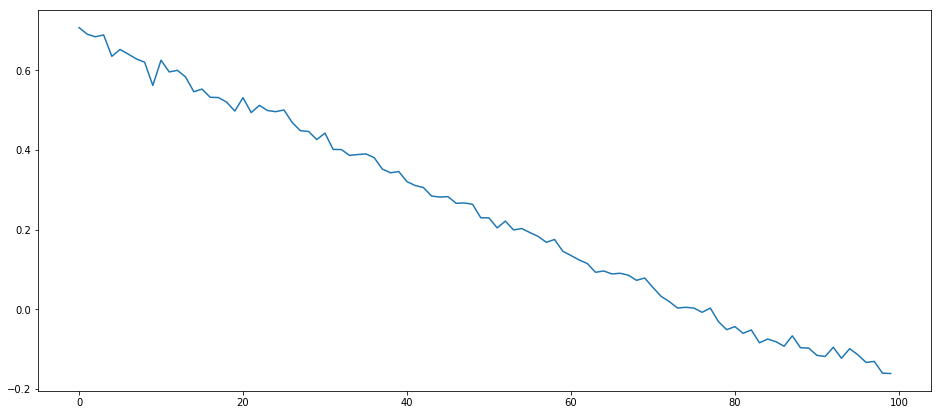

In [213]:
sh_corr=[]
for i in range(0,100):
    sh_corr.append(train.shift(i).dropna()["transfer_amt"].corr(train["total_purchase_amt"][i:]))
plt.figure(figsize=(16,7))
plt.plot(sh_corr)
shta=sh_corr

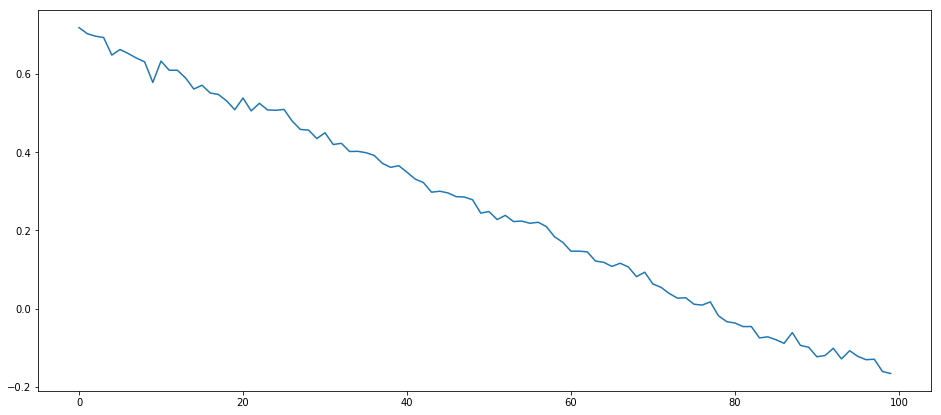

In [214]:
sh_corr=[]
for i in range(0,100):
    sh_corr.append(train.shift(i).dropna()["total_redeem_amt"].corr(train["total_purchase_amt"][i:]))
plt.figure(figsize=(16,7))
plt.plot(sh_corr)
sh_tra=sh_corr

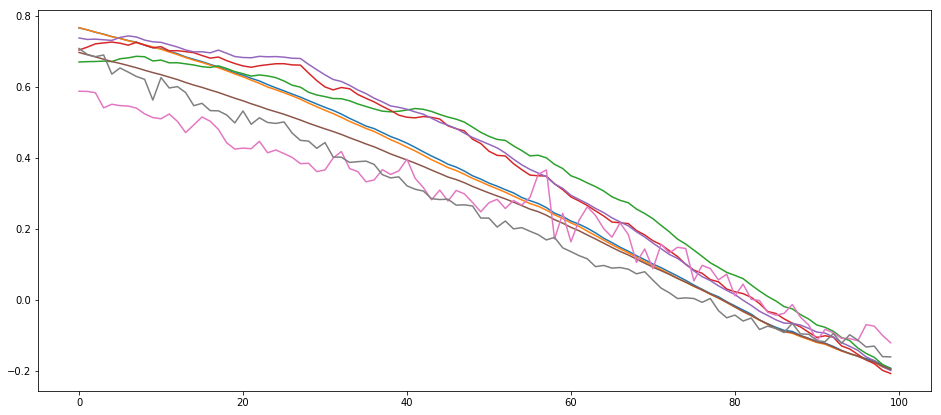

In [215]:
plt.figure(figsize=(16,7))
plt.plot(shmdy)
plt.plot(shm7y)
plt.plot(sh_ion)
plt.plot(sh_i1w)
plt.plot(sh_i1m)
plt.plot(sh_i3m)
plt.plot(sh_ca)
plt.plot(shta)

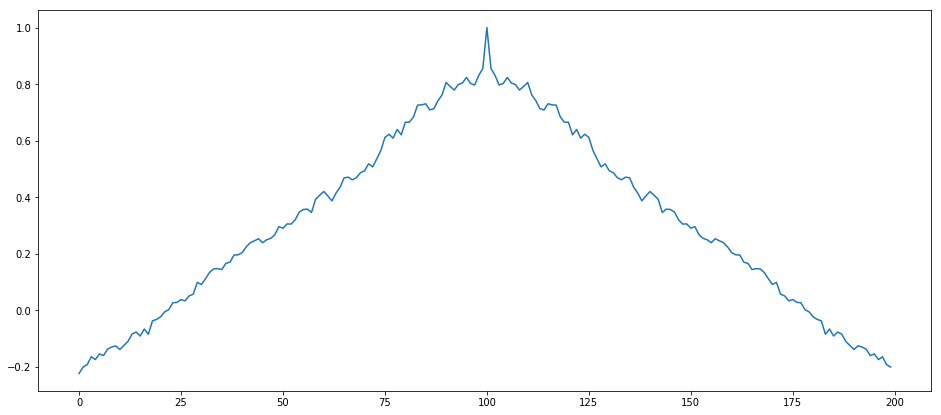

In [168]:
sh_corr=[]
for i in range(-100,0):
    sh_corr.append(train.shift(i).dropna()["total_purchase_amt"].corr(train["total_purchase_amt"][:i]))
for i in range(0,100):
    sh_corr.append(train.shift(i).dropna()["total_purchase_amt"].corr(train["total_purchase_amt"][i:]))
plt.figure(figsize=(16,7))
plt.plot(sh_corr)


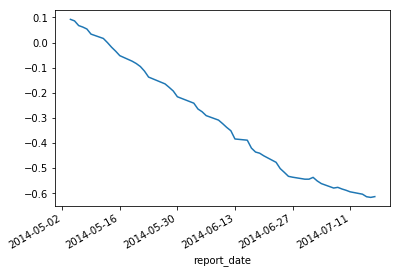

In [233]:
train["total_purchase_amt"].rolling(120).corr(train["Interest_O_N"].shift(90)).plot()

In [248]:
train

,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,...,Interest_O_N,Interest_1_W,Interest_2_W,Interest_1_M,Interest_3_M,Interest_6_M,Interest_9_M,Interest_1_Y,mfd_daily_yield,mfd_7daily_yield
report_date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,252327861,225364535,32488348,32458786,21250722,11208064,5525022,382160,5142862,5142862,...,1965.0960,2391.5430,2663.640,3034.0800,2335.0950,1869.3990,1888.3620,1945.9125,696.2067,2781.387
2013-07-02,278810703,252327861,29037390,29007510,16561183,12446327,2554548,350066,2204482,2204482,...,1817.2800,2280.0000,2435.520,2784.0000,2501.2800,2032.5120,2054.7840,2115.3600,742.1280,2963.520
2013-07-03,300127606,278810703,27270770,27234156,20493660,6740496,5953867,454406,5499461,5499461,...,1696.6000,2116.7580,2324.342,2594.8000,2568.8520,2110.7700,2135.5204,2196.6978,732.0330,3010.966
2013-07-04,312038062,300127606,18321185,18282230,12108178,6174052,6410729,535391,5875338,5875338,...,1751.0040,2059.5740,2334.672,2668.3460,2630.1670,2211.6101,2237.1848,2301.2000,743.8629,3087.269
2013-07-05,320923224,312038062,11648749,11607991,6930431,4677560,2763587,697926,2065661,2065661,...,1838.7200,2075.9040,2336.480,2604.9440,2686.8160,2299.6512,2325.5456,2393.6000,753.1680,3122.016
2013-07-08,409947895,361037358,57258266,57218409,47490938,9727471,8347729,852530,7495199,7495199,...,1888.4800,2120.4800,2137.880,2494.0000,2780.5200,2449.8040,2478.9780,2552.0000,761.4820,3061.820
2013-07-09,433273777,409947895,26798941,26755943,21541164,5214779,3473059,765509,2707550,2707550,...,1994.8860,2207.9440,2212.856,2638.9720,2899.9220,2592.0010,2623.0080,2701.6000,804.0944,3162.100
2013-07-10,461373114,433273777,30696506,30644691,20475437,10169254,2597169,603737,1993432,1993432,...,2012.3690,2222.2100,2383.150,2642.5110,2911.7760,2612.1800,2643.5633,2723.6000,791.8248,3124.093
2013-07-11,501939511,461373114,44075197,44021031,38701392,5319639,3508800,981695,2527105,2527105,...,2207.3926,2506.9800,2570.148,2862.9580,3089.6390,2776.6942,2809.9890,2895.2000,830.1328,3263.022


In [240]:
train["2014-04":]

,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,...,Interest_O_N,Interest_1_W,Interest_2_W,Interest_1_M,Interest_3_M,Interest_6_M,Interest_9_M,Interest_1_Y,mfd_daily_yield,mfd_7daily_yield
report_date,,,,,,,,,,,,,,,,,,,,,
2014-04-01,20592900643,20417009416,453320585,450478122,146539591,303938531,277429358,49540539,227888819,37116613,...,28081.0680,41200.5900,44120.3940,45070.800,53889.0000,48990.0000,48990.0000,48990.0,14077.7664,52478.088
2014-04-02,20675635695,20592900643,355347118,352449616,141024158,211425458,272612066,51040952,221571114,28301147,...,28945.4000,41455.7000,44193.2480,45135.200,53966.0000,49060.0000,49060.0000,49060.0,14099.8440,52562.884
2014-04-03,20772907358,20675635695,363877120,360958034,165866758,195091276,266605457,45762040,220843417,46915541,...,29125.3500,40508.9190,44003.9610,45415.800,54301.5000,49365.0000,49365.0000,49365.0,14181.5772,52939.026
2014-04-04,20824610615,20772907358,251895894,248968008,62838487,186129521,200192637,37871189,162321448,35154471,...,27237.6540,29544.4260,42172.5240,45317.226,54219.0000,49290.0000,49290.0000,49290.0,14134.4004,52907.886
2014-04-08,20978372726,20873617708,354770149,351854096,104834487,247019609,250015131,44570398,205444733,31814997,...,26997.0630,35734.0410,41893.7100,44152.587,54730.5000,49755.0000,49755.0000,49755.0,14193.1113,53416.968
2014-04-09,21072390013,20978372726,383347565,380410136,150308931,230101205,289330278,50308002,239022276,37522743,...,27402.7400,36703.6700,41824.1820,44014.401,55005.5000,50005.0000,50005.0000,50005.0,14240.4239,53605.360
2014-04-10,21172042609,21072390013,386567460,383627601,164835943,218791658,286914864,53154622,233760242,44846276,...,27515.0800,37235.7360,37306.0300,43933.750,55231.0000,50210.0000,50210.0000,50210.0,14261.6484,53734.742
2014-04-11,21132795057,21172042609,237829882,234895147,71143892,163751255,277077434,84205696,192871738,31674982,...,27703.5000,37283.8740,37304.0220,42401.466,55407.0000,50370.0000,50370.0000,50370.0,14210.3844,53785.086
2014-04-14,21110246338,21216380053,309853269,306943182,110231602,196711580,415986984,40950669,375036315,48560908,...,26825.4350,36289.0500,37610.5000,42337.225,55907.5000,50825.0000,50825.0000,50825.0,14279.7920,53874.500


In [242]:
train.corrwith(train["total_purchase_amt"])

tBalance               0.686911
yBalance               0.677891
total_purchase_amt     1.000000
direct_purchase_amt    0.999990
purchase_bal_amt       0.792121
purchase_bank_amt      0.973515
total_redeem_amt       0.718254
consume_amt            0.587143
transfer_amt           0.707637
tftobal_amt            0.581806
tftocard_amt           0.695797
share_amt              0.752886
category1              0.648521
category2              0.594569
category3              0.105087
category4              0.413640
Interest_O_N           0.669516
Interest_1_W           0.703146
Interest_2_W           0.703495
Interest_1_M           0.737094
Interest_3_M           0.696331
Interest_6_M           0.660016
Interest_9_M           0.657737
Interest_1_Y           0.656115
mfd_daily_yield        0.765403
mfd_7daily_yield       0.766468
dtype: float64

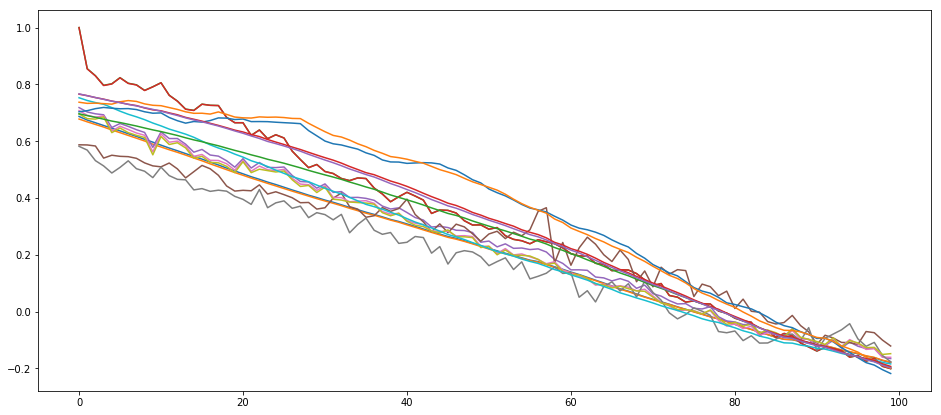

In [246]:
tp=train.copy()
tp.pop("Interest_O_N")
tp.pop("Interest_1_W")
tp.pop("Interest_6_M")
tp.pop("Interest_9_M")
tp.pop("Interest_1_Y")
tp.pop("purchase_bal_amt")
tp.pop("purchase_bank_amt")
tp.pop("category1")
tp.pop("category2")
tp.pop("category3")
tp.pop("category4")

sh_corr=[]
for i in range(0,100):
    sh_corr.append(tp.shift(i).corrwith(tp["total_purchase_amt"]).values)
plt.figure(figsize=(16,7))
plt.plot(sh_corr)


In [17]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn import model_selection
from sklearn import metrics
x=train.copy()
x.drop("total_purchase_amt",axis=1, inplace=True)
x.drop("total_redeem_amt",axis=1, inplace=True)
y=train.copy()["total_purchase_amt"]
lr=LinearRegression()
lr.fit(x,y)
lr.coef_

array([-1.40865380e-08,  1.41033789e-08,  4.65260862e-01,  1.35508708e-01,
        4.78958479e-01, -4.21480289e-10,  1.37177035e-10, -6.34779703e-11,
       -3.86898260e-10,  3.28107630e-03,  6.07911308e-11,  5.54468543e-11,
        1.13749392e-10,  1.89085960e-10,  5.41174375e-16,  9.85456499e-16,
        7.31125896e-16,  8.53483950e-16,  1.00267017e-15,  4.58660887e-15,
       -8.56953397e-15,  6.87297441e-15,  1.92207361e-15,  1.16573418e-15])

In [18]:
testc=test.copy()
testc.drop("total_purchase_amt",axis=1, inplace=True)
testc.drop("total_redeem_amt",axis=1, inplace=True)

In [19]:
pred=lr.predict(testc)

In [20]:
metrics.mean_squared_error(test["total_purchase_amt"], pred)

3023880801389655.5

In [34]:
train.shift(2)

,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,...,Interest_O_N,Interest_1_W,Interest_2_W,Interest_1_M,Interest_3_M,Interest_6_M,Interest_9_M,Interest_1_Y,mfd_daily_yield,mfd_7daily_yield
report_date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-03,0.000000,0.000000,0.022150,0.022211,0.059948,0.008799,0.005453,0.000178,0.006755,0.045582,...,0.007112,0.006673,0.008637,0.008603,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2013-07-04,0.001174,0.001194,0.018482,0.018535,0.040317,0.010265,0.000000,0.000000,0.000453,0.003055,...,0.003197,0.004431,0.004889,0.004620,0.002985,0.002886,0.002908,0.002940,0.003281,0.003547
2013-07-05,0.002119,0.002367,0.016604,0.016646,0.056779,0.003507,0.006240,0.000579,0.007520,0.050743,...,0.000000,0.001150,0.003063,0.001606,0.004199,0.004271,0.004319,0.004351,0.002559,0.004472
2013-07-08,0.002647,0.003311,0.007092,0.007110,0.021675,0.002837,0.007079,0.001028,0.008327,0.056183,...,0.001441,0.000000,0.003233,0.002777,0.005301,0.006055,0.006095,0.006165,0.003405,0.005958
2013-07-09,0.003041,0.003838,0.000000,0.000000,0.000000,0.001064,0.000384,0.001929,0.000155,0.001045,...,0.003765,0.000328,0.003262,0.001767,0.006319,0.007613,0.007639,0.007768,0.004069,0.006634
2013-07-10,0.006988,0.006008,0.048478,0.048586,0.169796,0.007045,0.010635,0.002787,0.011801,0.079628,...,0.005083,0.001224,0.000000,0.000000,0.008002,0.010269,0.010320,0.010516,0.004663,0.005462
2013-07-11,0.008022,0.008173,0.016103,0.016136,0.061164,0.001700,0.001686,0.002304,0.001532,0.010336,...,0.007901,0.002983,0.001232,0.002309,0.010147,0.012785,0.012837,0.013112,0.007707,0.007415


In [228]:
tf = pd.read_csv("all_time_features.csv", parse_dates=[
                       "report_date"], date_parser=lambda date: pd.datetime.strptime(date, "%Y-%m-%d"))
tf=tf.set_index("report_date")

In [229]:
tf.std()

isweekend             0.451653
isholiday             0.231891
isstartofmonth        0.338088
ismidofmonth          0.456724
isendofmonth          0.384133
weekofmonth           1.321126
islastdayofweekend    0.349671
islastdayofholiday    0.131289
yesterdayisweekday    0.349671
yesterdayisholiday    0.131289
firstdayofmonth       0.178368
dtype: float64

In [233]:
tf.corrwith(alldata["total_purchase_amt"])

isweekend            -0.262030
isholiday            -0.180447
isstartofmonth       -0.054732
ismidofmonth          0.024695
isendofmonth          0.010837
weekofmonth           0.115507
islastdayofweekend   -0.158932
islastdayofholiday   -0.040497
yesterdayisweekday   -0.045476
yesterdayisholiday   -0.030323
firstdayofmonth      -0.020041
dtype: float64

In [234]:
ualldata=(alldata-alldata.min())/(alldata.max()-alldata.min())

In [235]:
tf.corrwith(ualldata["total_purchase_amt"])

isweekend            -0.262030
isholiday            -0.180447
isstartofmonth       -0.054732
ismidofmonth          0.024695
isendofmonth          0.010837
weekofmonth           0.115507
islastdayofweekend   -0.158932
islastdayofholiday   -0.040497
yesterdayisweekday   -0.045476
yesterdayisholiday   -0.030323
firstdayofmonth      -0.020041
dtype: float64

In [265]:
# 线性回归
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# 划分训练集和测试集
train_x = tf["2014-04":"2014-07"]
test_x = tf["2014-08":"2014-08"]
train_y = utrain[:"2014-07"]["total_purchase_amt"]
utest = (test-test.min())/(test.max()-test.min())
test_y = utest["total_purchase_amt"]

In [321]:
train_y.values.shape

(122,)

MSE:0.033884
RMSE:0.184075
R-Square:0.411304 


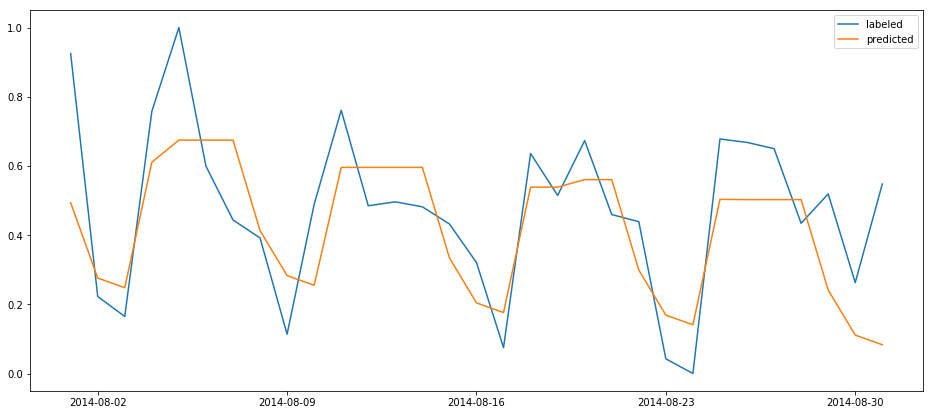

In [273]:
model = LinearRegression()
model.fit(train_x, train_y)
pred_y = model.predict(test_x)
pred_y = pd.Series(pred_y, index=pd.date_range('2014-08-01', '2014-08-31', freq='D'))
fig=plt.figure(figsize=(16,7))
ax1=fig.add_subplot(111)
plt.plot(test_y, label="labeled")
plt.plot(pred_y, label="predicted")
plt.legend()
print("MSE:%f" % (metrics.mean_squared_error(test_y, pred_y)))
print("RMSE:%f" % np.sqrt(metrics.mean_squared_error(test_y, pred_y)))
print("R-Square:%f "% model.score(test_x,test_y))

In [285]:
from sklearn.model_selection import cross_val_predict
model = LinearRegression()
x = tf["2014-04":"2014-08"]
y = ualldata["2014-04":"2014-08"]
predicted = cross_val_predict(model, x,y, cv=5)
print("MSE:",metrics.mean_squared_error(y, predicted))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y, predicted)))

MSE: 0.020660513391477585
RMSE: 0.14373765474459915


In [307]:
# 记录下归一化的相关参数
stabledata = alldata["2014-04":]
tpa_scale = stabledata["total_purchase_amt"].max()-stabledata["total_purchase_amt"].min()
tpa_bias = stabledata["total_purchase_amt"].min()
tra_scale = stabledata["total_redeem_amt"].max()-stabledata["total_redeem_amt"].min()
tra_bias = stabledata["total_redeem_amt"].min()
# 归一化
tpa_y = (stabledata["total_purchase_amt"]-tpa_bias)/tpa_scale
tra_y = (stabledata["total_purchase_amt"]-tpa_bias)/tpa_scale
train_x = tf["2014-04":"2014-08"]
test_x = tf["2014-09":]
# 拟合total_purchase_amt
tpa_model = LinearRegression()
tpa_model.fit(train_x,tpa_y)
tpa_pred = tpa_model.predict(test_x)
# 拟合total_redeem_amt
tra_model = LinearRegression()
tra_model.fit(train_x,tra_y)
tra_pred = tra_model.predict(test_x)
# 数据按归一化时的参数恢复到原数量级
tpa_output = tpa_pred*tpa_scale+tpa_bias
tra_output = tra_pred*tra_scale+tra_bias
output = pd.DataFrame(data={"date":pd.date_range('2014-09-01', '2014-09-30', freq='D'),"tpa":tpa_output,"tra":tra_output})
output = output.set_index("date")
output[["tpa","tra"]] = output[["tpa","tra"]].astype(int)
output.to_csv("tc_comp_predict_table.csv",date_format="%Y%m%d")

In [296]:
output.shape

(30, 3)

In [306]:
pd.to_numeric(output["tpa"])

date
2014-09-01    3.894837e+08
2014-09-02    3.366720e+08
2014-09-03    3.366720e+08
2014-09-04    3.366720e+08
2014-09-05    2.822737e+08
2014-09-06    2.291306e+08
2014-09-07    1.849022e+08
2014-09-08    2.289649e+08
2014-09-09    3.381912e+08
2014-09-10    3.381912e+08
2014-09-11    3.301076e+08
2014-09-12    2.569174e+08
2014-09-13    2.037743e+08
2014-09-14    2.007332e+08
2014-09-15    3.128348e+08
2014-09-16    3.128348e+08
2014-09-17    3.128348e+08
2014-09-18    3.128348e+08
2014-09-19    2.396446e+08
2014-09-20    1.945851e+08
2014-09-21    1.915440e+08
2014-09-22    3.036456e+08
2014-09-23    3.036456e+08
2014-09-24    3.036456e+08
2014-09-25    3.036456e+08
2014-09-26    2.395306e+08
2014-09-27    1.863875e+08
2014-09-28    1.833464e+08
2014-09-29    2.954480e+08
2014-09-30    2.954480e+08
Freq: D, Name: tpa, dtype: float64

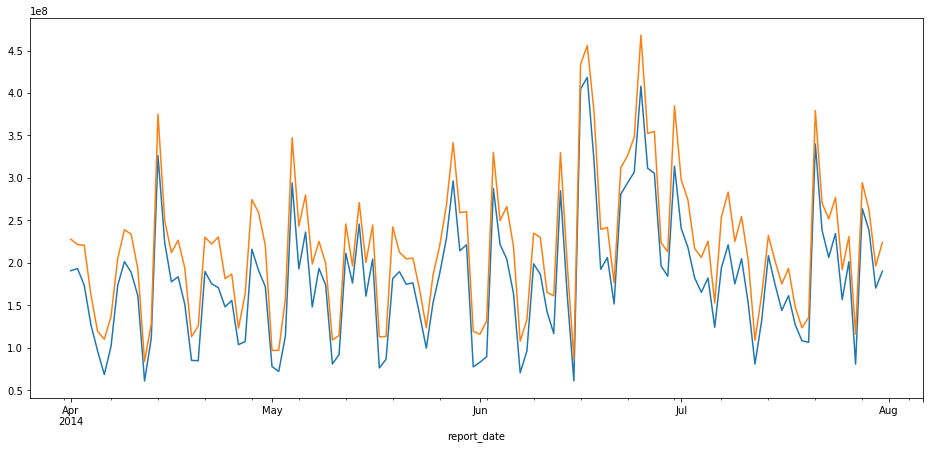

In [330]:
train["tftocard_amt"].plot(figsize=(16,7))
train["transfer_amt"].plot(figsize=(16,7))

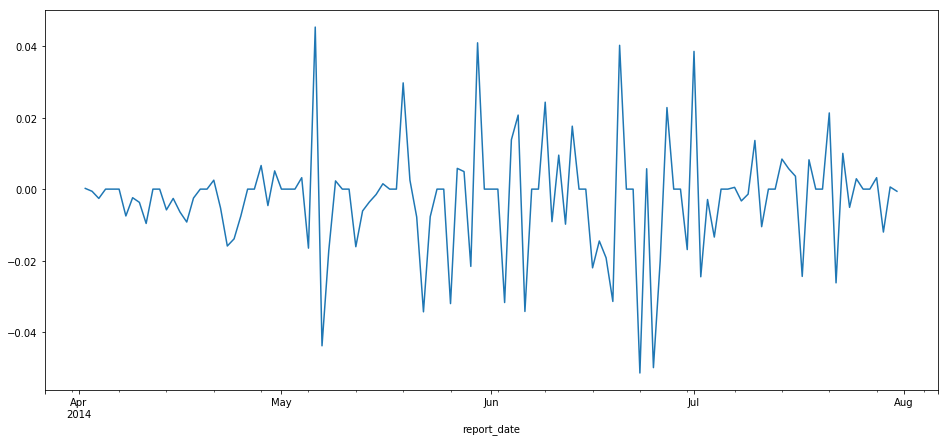

In [363]:
train["mfd_daily_yield"].diff(1).dropna().plot(figsize=(16,7))

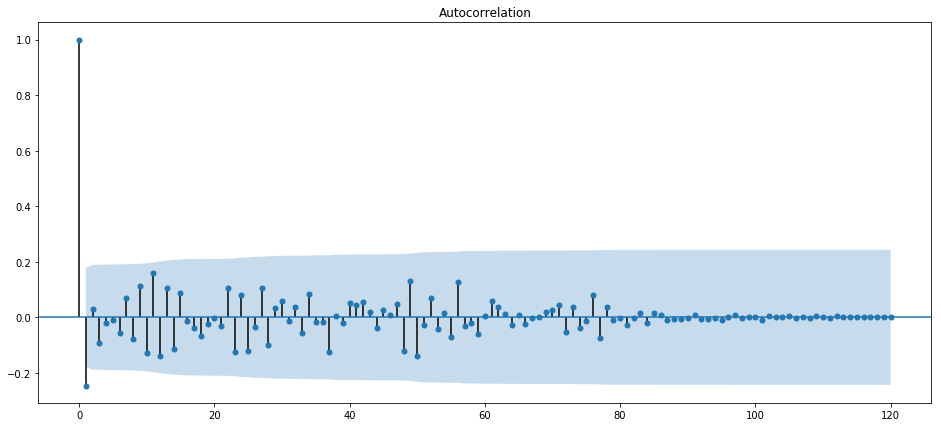

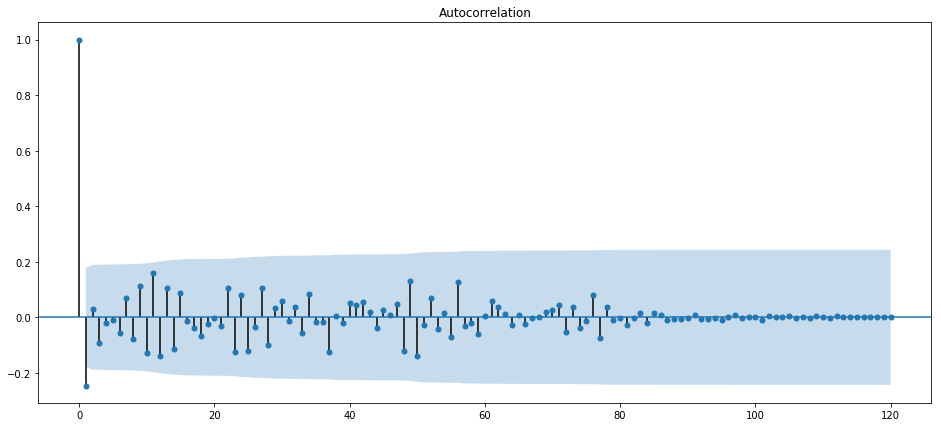

In [362]:
fig=plt.figure(figsize=(16,7))
ax1=fig.add_subplot(111)
plot_acf(train["mfd_daily_yield"].diff(1).dropna(),ax=ax1)